## Chennapragada. V. S. S. Mani Saketh
## AP19110010348
## CSE - C
## ML Assignment 4

1. Implement K-NN Classifier for the classification of any dataset (maybe iris dataset) of your choice.
        a. Load the data set
        b. Split the data set to train and test sets
        c. Test your model using the test set. Find accuracy and confusion Matrix.
        d. Examine the effect of the value of K on accuracy/performance. Plot the curve “k vs accuracy” and find out the value of k for maximum accuracy for the test samples.     


NOTE: Don’t use any library for KNN classification. Develop a generalized function to implement K-NN Classifier.


The Predictions using KNN Classification
[0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2, 1]
The accuracy score - 
0.9555555555555556
Confusion Matrix - 
[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]
Value of K Corresponding to the Highest Accuracy Value is - 
K-Value -     Highest Accuracy
11      -     0.9777777777777777


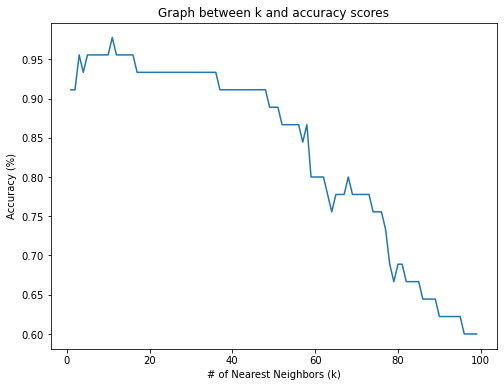

In [30]:
#Including Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
#Importing datasets
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
X = df.drop('target', axis=1)
y = df.target
#Function for calculating Manhattan Distance
def manhattan_distance(a, b):    
    # Store the number of dimensions
    dim = len(a)
    # Set initial distance to 0
    distance = 0
    # Calculate manhattan distance using parameter p
    for i in range(dim):
        distance += abs(a[i] - b[i])
    return distance
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)
# Scaling the X data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
def knn_predict(X_train, X_test, y_train, y_test, k):
    # Making predictions on the test data
    y_hat_test = []
    for test_point in X_test:
        distances = []
        for train_point in X_train:
            distance = manhattan_distance(test_point, train_point)
            distances.append(distance)
        # Storing distances in a dataframe
        df_dists = pd.DataFrame(data=distances, columns=['dist'],index=y_train.index)
        # Sorting distances, and only considering the k closest points
        df_nn = df_dists.sort_values(by=['dist'], axis=0)[:k]
        # Creating counter object to track the labels of k closest neighbors
        counter = Counter(y_train[df_nn.index])
        # Getting most common label of all the nearest neighbors
        prediction = counter.most_common()[0][0]
        # Appending prediction to output list
        y_hat_test.append(prediction)
    return y_hat_test
# Making predictions on test dataset
y_hat_test = knn_predict(X_train, X_test, y_train, y_test, k=5)
print("The Predictions using KNN Classification")
print(y_hat_test)

# Getting test accuracy score
from sklearn.metrics import accuracy_score
print("The accuracy score - ")
print(accuracy_score(y_test, y_hat_test))

#Confusion Matrix
print("Confusion Matrix - ")
print(confusion_matrix(y_test, y_hat_test))

# Obtaining accuracy score varying k from 1 to 99
accuracies = []
kn = [int(i) for i in range(1,100)]
for i in range(len(kn)):
    y_hat_test = knn_predict(X_train, X_test, y_train, y_test, kn[i])
    accuracies.append(accuracy_score(y_test, y_hat_test))

# Plotting the results 
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(kn, accuracies)
plt.title('Graph between k and accuracy scores')
ax.set_xlabel('# of Nearest Neighbors (k)')
ax.set_ylabel('Accuracy (%)')

#Largest Values
print("Value of K Corresponding to the Highest Accuracy Value is - ")
max_y = max(accuracies)
max_x = kn[accuracies.index(max_y)]
print("K-Value -     Highest Accuracy")
print(str(max_x)+ "      -     " + str(max_y))
